In [1]:
from shapely.geometry import Point
import pandas as pd
import random

from esda.moran import (Moran, Moran_BV,
                        Moran_Local, Moran_Local_BV)

# Run preprocessing  


2. **Import Well Data**: The code reads two CSV files, 'WELL.csv' and 'WELL_TEST.csv' from the orginal bbwt database, containing well data and well test data, respectively. It then creates a subset of the well test data, including only 'WELL_ID' and 'WELL_TEST_ID', and another subset of the well data, including 'WELL_ID', 'LATTITUDE', and 'LONGITUDE'.

3. **Merging Location Data**: The code merges the well test data subset with the well data subset based on the 'WELL_ID' column, adding location information (latitude and longitude) to the well test data. This merged data is stored in the `well_analysis_full_lat_long` dataframe.


6. **Creating GeoDataframes**: Create GeoDataframe from the merged dataframes `well_analysis_full_lat_long` This GeoDataframes is used for geospatial analysis, allowing the data to be visualized on maps and processed using geospatial functions.

7. **Removing Duplicates**: The code identifies and removes identical well locations that may have different well IDs. These duplicates are dissolved into single points, by taking the first observation with two identical lat longs and dropping additional observations

8. **Data Cleaning**: Rows with any missing values are dropped from the `well_analysis_full_geo_disolved_first` GeoDataframe.

9. **Chemistry Variables**: Create a list chemistry variable column names 


The code snippet provided is an essential part of a larger data processing and analysis workflow, where additional tasks such as geospatial analysis, statistical analysis, or machine learning may be performed on the cleaned and merged data.


In [2]:
%run pre_proc_for_geospatial.py
well_analysis_full_geo_disolved_first.head()


,geometry,WELL_ID,WELL_TEST_ID,LATTITUDE,LONGITUDE,WQUAL_DETAILS_ID,total alkalinity_value,carbonate_value,nitrite as nitrogen_value,nitrate as nitrogen_value,...,manganese_value,iron_value,sulphate_value,calcium_value,sodium_value,potassium_value,magnesium_value,iron (total)_value,nitrite + nitrate as nitrogen_value,ionic balance_value
5,POINT (-114.66374 51.90751),15267,15267,51.907506,-114.663735,1218525,446.0,12.0,0.010,0.27,...,0.005,0.10,16.0,25.7,176.0,1.9,10.0,0.1,0.27,104.0
6,POINT (-114.66496 51.90884),15268,15268,51.908837,-114.664958,1218526,310.0,64.0,0.010,0.02,...,0.005,0.10,4.0,3.6,157.0,2.0,2.9,6.0,0.02,103.0
7,POINT (-114.31471 51.84956),9509,2618,51.849557,-114.314710,1157083,460.0,6.0,0.005,0.12,...,0.054,0.01,18.0,33.2,152.0,2.9,10.9,2.5,0.12,94.0
8,POINT (-114.31471 51.85688),154,2732,51.856883,-114.314706,1157077,398.0,6.0,0.034,0.15,...,0.016,0.03,20.0,11.8,164.0,1.8,4.0,20.4,0.19,96.0
9,POINT (-114.30290 51.85688),2786,2991,51.856877,-114.302896,1157075,455.0,6.0,0.005,2.11,...,0.018,0.01,27.0,144.0,12.7,1.9,33.4,0.4,2.11,100.0


# Create a dataframe of distances bands for Moran's I spatial autocorrelation statistic 

### STEPS
1. **Defining Chemistry Variables**: 

2. **Setting Maximum Allowable Concentrations**: Another list, `chemistry_variables_mac_list`, is defined, containing chemistry variables for which maximum allowable concentrations (MAC) are specified, along with the corresponding MAC values. This is from the Goverment of Canada guidelines https://www.canada.ca/en/health-canada/services/environmental-workplace-health/reports-publications/water-quality/guidelines-canadian-drinking-water-quality-summary-table.html

3. **Setting Aesthetic Objective Values**: A list of chemistry variables, `chemistry_variables_ao_list`, is provided for which aesthetic objective (AO) values are defined in a dictionary named `ao_values_dict`. This is also from the Goverment of Canada guidelines

4. **Calculating Moran's I Values**: The code includes a dictionary named `variable_morans_I`, which contains Moran's I statistics calculated for each chemistry variable at different lag distances. The Moran's I values are stored in nested dictionaries under the key `'moran_distance_values'`. This dictionary was pre-calculated elsewhere 

5. **Finding Highest Lag Distances Above Threshold**: The code defines a function, `find_highest_lag_distances_above_threshold`, which identifies the highest lag distance for each chemistry variable where the Moran's I value is above a specified threshold. The results are stored in a dictionary named `highest_lag_distances`.

6. **Finding Lowest Lag Distances Above Threshold**: A similar function, `find_lowest_lag_distances_above_threshold`, identifies the lowest lag distance for each chemistry variable where the Moran's I value is above a specified threshold. The results are stored in a dictionary named `lowest_lag_distances`.

7. **Threshold Analysis**: The code analyzes Moran's I statistics for two different threshold values (0.5 and 0.3). It prints the highest lag distances above these thresholds for each chemistry variable and updates a dataframe named `spatial_autocor_df` with the corresponding lag distances for each variable.

With this table we can see at what distances these variables exhibit strong or weak spatial autocorrelation, which can be valuable for further analysis and decision-making


In [3]:
#Initialize a df containing the max distances in radians where each chemistry variable has a 0.5 (strong) and 0.3 (weak) spatial autocorrelation. 
%run get_spatial_autocor_df.py
spatial_autocor_df

For 'ph_value', the highest lag distance above Moran I 0.5 is 0.005 with Moran's I of 0.505
For 'bicarbonate_value', the highest lag distance above Moran I 0.5 is 0.030 with Moran's I of 0.514
For 'total dissolved solids_value', the highest lag distance above Moran I 0.5 is 0.010 with Moran's I of 0.517
For 'fluoride_value', the highest lag distance above Moran I 0.5 is 0.010 with Moran's I of 0.522
For 'chloride_value', the highest lag distance above Moran I 0.5 is 0.005 with Moran's I of 0.554
For 'sulphate_value', the highest lag distance above Moran I 0.5 is 0.010 with Moran's I of 0.503
For 'sodium_value', the highest lag distance above Moran I 0.5 is 0.010 with Moran's I of 0.586
For 'magnesium_value', the highest lag distance above Moran I 0.5 is 0.005 with Moran's I of 0.523
For 'nitrate as nitrogen_value', the highest lag distance above Moran I 0.3 is 0.010 with Moran's I of 0.352
For 'ph_value', the highest lag distance above Moran I 0.3 is 0.020 with Moran's I of 0.343
For '

,chemistry_variables,strong_0.5_spatial_auto_cor_dist,weak_0.3_spatial_auto_cor_dist
0,carbonate_value,NaN,NaN
1,nitrite as nitrogen_value,NaN,NaN
2,nitrate as nitrogen_value,NaN,0.01
3,ph_value,0.005,0.02
4,bicarbonate_value,0.030,0.20
5,total dissolved solids_value,0.010,0.06
6,fluoride_value,0.010,0.05
7,chloride_value,0.005,0.09
8,manganese_value,NaN,NaN
9,iron_value,NaN,NaN


# Estimate water quality parameters by location

Here we estimate water quality parameters based on user-defined locations and spatial autocorrelation. Below is a summary of the key functionalities:

1. **Create User Point (`create_user_point`)**:
   - The code prompts the user to input latitude and longitude in decimal degrees.
   - It creates a `Point` object representing the user's location.

2. **Get Observations Within Buffer (`get_observations_within_buffer`)**:
   - Given a user point, buffer distance in kilometers, and a GeoDataFrame (`gdf`), this function calculates a buffer area around the user's location.
   - It identifies observations (wells) from the GeoDataFrame that intersect with the buffer area.
   - The observations within the buffer are returned as a subset of the GeoDataFrame.

3. **Calculate Mean and Estimated Values (`calculate_mean_and_estimated_values`)**:
   - This function takes user latitude, longitude, several data sources, and dictionaries containing Maximum Allowable Concentrations (MAC) and Aesthetic Objective (AO) values for chemistry variables.
   - It calculates mean and estimated values for chemistry variables within defined buffer zones based on spatial autocorrelation thresholds (0.5 and 0.3 Moran's I).
   - For each variable, it calculates both strong (0.5 Moran's I) and weak (0.3 Moran's I) estimates by calculating a weighted "average" combining the mean value within corresponding spatial lag and the median value of the entire dataset
   - It checks if the estimated values exceed MAC or AO values and prints warnings if necessary.
   - The function also tracks nearby wells that contribute to the estimates and stores them in sets.
   - The results are returned as dictionaries and sets containing mean and estimated values, as well as nearby well IDs.

Overall, this code is designed to help users assess water quality estimates for specific locations, considering spatial autocorrelation and predefined thresholds. It calculates estimates for various chemistry variables and checks if they comply with defined standards (MAC and AO). The code provides valuable insights into water quality analysis and allows users to make informed decisions about drinking water safety.

Note: this will not return estimates where the user location does not contain wells within the distance threshold.


In [4]:
def create_user_point():
    user_lat = float(input("Enter latitude (in decimal degrees): "))
    user_lon = float(input("Enter longitude (in decimal degrees): "))

    user_point = Point(user_lon, user_lat)
    
    return user_point

def get_observations_within_buffer(user_point,buffer_distance_km,gdf):
    
    buffered_point = user_point.buffer(buffer_distance_km / 111.32)  # Approximate conversion from degrees to kilometers (111.32 km per degree of latitude)

    observations_within_buffer = well_analysis_full_geo_disolved_first[gdf.geometry.intersects(buffered_point)]
    
    return observations_within_buffer

def calculate_mean_and_estimated_values(user_lat, user_lon, spatial_autocor_df, well_analysis_full_geo_disolved_first, mac_values_dict, ao_values_dict):
    user_point = Point(user_lon, user_lat)
    
    mean_values_strong = {}
    mean_values_weak = {}
    estimated_values_strong = {}
    estimated_values_weak = {}
    nearby_wells_strong = set()
    nearby_wells_weak = set()
    
    for index, row in spatial_autocor_df.iterrows():
        chemistry_variable = row['chemistry_variables']
        
        if row['strong_0.5_spatial_auto_cor_dist'] > 0:
            strong_auto_cor_at = row['strong_0.5_spatial_auto_cor_dist']
            km_buffer = strong_auto_cor_at * 111.32
            observations_within_buffer = get_observations_within_buffer(user_point, km_buffer, well_analysis_full_geo_disolved_first)
            mean_values_strong[chemistry_variable] = observations_within_buffer[chemistry_variable].mean()
            estimated_values_strong[chemistry_variable] = ((observations_within_buffer[chemistry_variable].mean() * 0.5) + (well_analysis_full_geo_disolved_first[chemistry_variable].median() * 0.5)) 
            if chemistry_variable in mac_values_dict:
                if estimated_values_strong[chemistry_variable] > mac_values_dict[chemistry_variable]:
                    print(f'WARNING!: Value Estimate (0.5 Moran\'s I) {chemistry_variable} of {estimated_values_strong[chemistry_variable]:.2f}, exceeds max allowable standard for drinking')
            if chemistry_variable in ao_values_dict:
                if estimated_values_strong[chemistry_variable] > ao_values_dict[chemistry_variable]:
                    print(f'Estimate (0.5 Moran\'s I) {chemistry_variable} of {estimated_values_strong[chemistry_variable]:.2f}, exceeds aesthetic objective for drinking')
            for well_id in observations_within_buffer['WELL_ID']:
                nearby_wells_strong.add(well_id)
        
        if row['weak_0.3_spatial_auto_cor_dist'] > 0:
            weak_auto_cor_at = row['weak_0.3_spatial_auto_cor_dist']
            km_buffer = weak_auto_cor_at * 111.32
            observations_within_buffer = get_observations_within_buffer(user_point, km_buffer, well_analysis_full_geo_disolved_first)
            mean_values_weak[chemistry_variable] = observations_within_buffer[chemistry_variable].mean()
            estimated_values_weak[chemistry_variable] = ((observations_within_buffer[chemistry_variable].mean() * 0.3) + (well_analysis_full_geo_disolved_first[chemistry_variable].median() * 0.7)) 
            #if chemistry_variable in mac_values_dict:
                #if estimated_values_weak[chemistry_variable] > mac_values_dict[chemistry_variable]:
                    #print(f'WARNING!: Estimate (0.3 Moran\'s I) {chemistry_variable} is {estimated_values_weak[chemistry_variable]:.2f},  exceeds max allowable standard for drinking')
            #if chemistry_variable in ao_values_dict:
                #if estimated_values_weak[chemistry_variable] > ao_values_dict[chemistry_variable]:
                    #print(f'Estimate (0.3 Moran\'s I) {chemistry_variable} is {estimated_values_weak[chemistry_variable]:.2f}, exceeds aesthetic objective for drinking')
            for well_id in observations_within_buffer['WELL_ID']:
                nearby_wells_weak.add(well_id)
        
    
    return mean_values_strong, mean_values_weak, estimated_values_strong, estimated_values_weak, nearby_wells_strong, nearby_wells_weak


In [5]:
import random

def generate_random_coordinates():
    '''Generates random coordinates as a tuple, for an area 210km by 178km  NW 
    of Calgary and SW of Edmonton. Chosen for dense well coverage '''
    # Define the boundaries
    min_lat = 50.8  # Minimum latitude for Alberta
    max_lat = 52.7  # Maximum latitude for Alberta
    min_lon = -113.9  # Minimum longitude for Alberta
    max_lon = -112.3  # Maximum longitude for Alberta

    # Generate random latitude and longitude within Alberta's boundaries
    random_lat = random.uniform(min_lat, max_lat)
    random_lon = random.uniform(min_lon, max_lon)

    return random_lat, random_lon



In [6]:
def print_non_nan_key_value_pairs(data_dict):
    found_non_nan = False  # Initialize a flag to track if any non-NaN values were found
    
    for key, value in data_dict.items():
        if not pd.isna(value):
            found_non_nan = True
            print(f"{key}: {value:.2f}")  # Format the value to 2 decimal places
    
    if not found_non_nan:
        print("No wells found within bounds")


# Return estimates for a random potential well location

In [7]:
random_coordinates = generate_random_coordinates()
print("Random Coordinates:", random_coordinates,'\n')
# assign user_point to the random coodinates 
user_point=Point(random_coordinates[1], random_coordinates[0])

mean_strong, mean_weak, estimated_strong, estimated_weak, nearby_wells_strong,nearby_wells_weak = calculate_mean_and_estimated_values(
    user_point.y, user_point.x, spatial_autocor_df, well_analysis_full_geo_disolved_first, mac_values_dict,ao_values_dict)
print("\n")  
print(f'There are {len(nearby_wells_strong)} nearby wells within ranges of 0.5 Moran I with WELL_IDs:{nearby_wells_strong}\n')

print('Estimated values for features with strong spatial auto correlation:')
print_non_nan_key_value_pairs(estimated_strong)
print("\n")  
print(f'There are {len(nearby_wells_weak)} nearby wells within ranges of 0.3 Moran I: \n')
print('Estimated values for features with weak spatial auto correlation:')
print_non_nan_key_value_pairs(estimated_weak)

Random Coordinates: (51.684192345984556, -113.47743164151157) 

Estimate (0.5 Moran's I) total dissolved solids_value of 1064.25, exceeds aesthetic objective for drinking
Estimate (0.5 Moran's I) sodium_value of 348.50, exceeds aesthetic objective for drinking


There are 9 nearby wells within ranges of 0.5 Moran I with WELL_IDs:{15456, 7202, 8586, 1230, 10131, 6292, 7159, 15866, 5595}

Estimated values for features with strong spatial auto correlation:
bicarbonate_value: 594.11
total dissolved solids_value: 1064.25
fluoride_value: 0.55
sulphate_value: 324.25
sodium_value: 348.50


There are 720 nearby wells within ranges of 0.3 Moran I: 

Estimated values for features with weak spatial auto correlation:
nitrate as nitrogen_value: 0.07
ph_value: 8.36
bicarbonate_value: 595.65
total dissolved solids_value: 948.13
fluoride_value: 0.69
chloride_value: 8.27
sulphate_value: 265.37
calcium_value: 17.01
sodium_value: 322.47
magnesium_value: 4.10
nitrite + nitrate as nitrogen_value: 0.08


# Returns estimated values for any area with known fluoride concentrations

In [8]:
# Test app for area with known issues of high fluoride 

fluoride_test_user_point=Point(-113.49445 ,51.060322)


mean_strong, mean_weak, estimated_strong, estimated_weak, nearby_wells_strong,nearby_wells_weak = calculate_mean_and_estimated_values(
    fluoride_test_user_point.y, fluoride_test_user_point.x, spatial_autocor_df, well_analysis_full_geo_disolved_first, mac_values_dict,ao_values_dict)
print("\n")  
print(f'There are {len(nearby_wells_strong)} nearby wells within range of strong spatial autocorrelations with WELL_IDs:{nearby_wells_strong}\n')

print('Estimated values for features with strong spatial auto correlation:')
print_non_nan_key_value_pairs(estimated_strong)
print("\n")  
print(f'There are {len(nearby_wells_weak)} nearby wells within range of weak spatial autocorrelations: \n')
print('Estimated values for features with weak spatial auto correlation:')
print_non_nan_key_value_pairs(estimated_weak)



Estimate (0.5 Moran's I) ph_value of 8.58, exceeds aesthetic objective for drinking
Estimate (0.5 Moran's I) total dissolved solids_value of 980.54, exceeds aesthetic objective for drinking
WARNING!: Value Estimate (0.5 Moran's I) fluoride_value of 2.71, exceeds max allowable standard for drinking
Estimate (0.5 Moran's I) sodium_value of 335.77, exceeds aesthetic objective for drinking


There are 81 nearby wells within range of strong spatial autocorrelations with WELL_IDs:{7680, 7682, 9266, 9272, 8768, 10837, 10841, 10842, 11356, 10848, 1636, 11372, 12404, 4220, 14998, 14999, 12438, 15001, 15002, 15003, 15006, 15007, 12963, 4260, 4261, 4262, 4263, 4264, 4269, 11953, 12978, 6841, 12475, 12480, 9927, 11981, 11479, 9950, 10981, 11497, 2285, 11517, 9988, 2823, 12552, 12553, 8973, 7471, 11065, 1856, 11073, 11593, 4427, 11094, 1387, 8561, 10101, 10111, 10112, 10115, 901, 10119, 12684, 10646, 12194, 11182, 12723, 12728, 6586, 11709, 11716, 10694, 10695, 11719, 11720, 10199, 10201, 9692, 407

In [9]:
#return the mean 
mean_strong, mean_weak, estimated_strong, estimated_weak, nearby_wells_strong,nearby_wells_weak = calculate_mean_and_estimated_values(
    user_point.y, user_point.x, spatial_autocor_df, well_analysis_full_geo_disolved_first, mac_values_dict,ao_values_dict)




print('Estimated values for features with strong spatial auto correlation:')
print_non_nan_key_value_pairs(estimated_strong)
print("\n")  
print('Estimated values for features with weak spatial auto correlation:')
print_non_nan_key_value_pairs(mean_weak)

Estimate (0.5 Moran's I) total dissolved solids_value of 1064.25, exceeds aesthetic objective for drinking
Estimate (0.5 Moran's I) sodium_value of 348.50, exceeds aesthetic objective for drinking
Estimated values for features with strong spatial auto correlation:
bicarbonate_value: 594.11
total dissolved solids_value: 1064.25
fluoride_value: 0.55
sulphate_value: 324.25
sodium_value: 348.50


Estimated values for features with weak spatial auto correlation:
nitrate as nitrogen_value: 0.11
ph_value: 8.27
bicarbonate_value: 618.16
total dissolved solids_value: 1009.09
fluoride_value: 0.96
chloride_value: 11.22
sulphate_value: 347.88
calcium_value: 29.40
sodium_value: 332.91
magnesium_value: 8.78
nitrite + nitrate as nitrogen_value: 0.11


In [10]:
well_analysis_full_geo_disolved_first['total dissolved solids_value'].median()

922.0

In [11]:
spatial_autocor_df

,chemistry_variables,strong_0.5_spatial_auto_cor_dist,weak_0.3_spatial_auto_cor_dist
0,carbonate_value,NaN,NaN
1,nitrite as nitrogen_value,NaN,NaN
2,nitrate as nitrogen_value,NaN,0.01
3,ph_value,0.005,0.02
4,bicarbonate_value,0.030,0.20
5,total dissolved solids_value,0.010,0.06
6,fluoride_value,0.010,0.05
7,chloride_value,0.005,0.09
8,manganese_value,NaN,NaN
9,iron_value,NaN,NaN


# Moran's I Scatterplots for select variables

Interpretation:

By examining the scatter plots below, you can see a pattern of positive correlation at small distance bands that becomes less strong as the distance band increases. The relationship is strongest with bicarbonate, present with fluoride and questionable with nitrates

If the points in the High High and Low-Low quadrants dominate the plot, it indicates strong spatial autocorrelation and clustering of similar values.
If points are concentrated in the High-Low and Low-High quadrants, it suggests a lack of spatial autocorrelation and randomness.
A balanced distribution of points across all quadrants may indicate a spatially random distribution.

lag distance of 0.555 kms


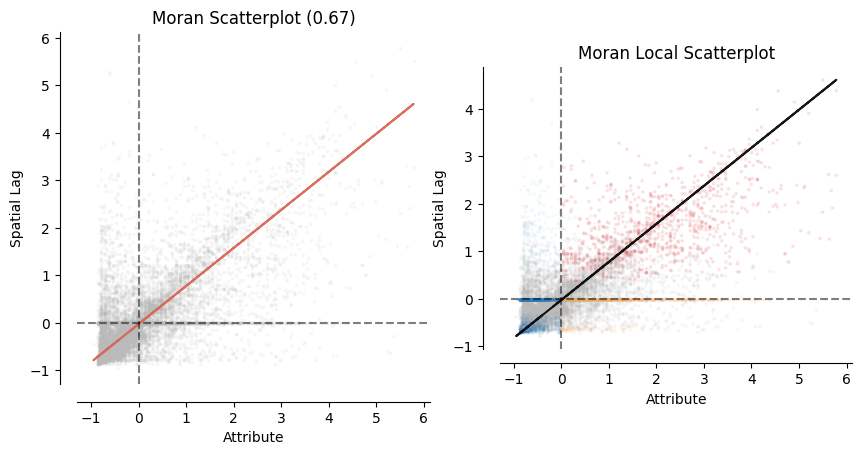

lag distance of 1.11 kms


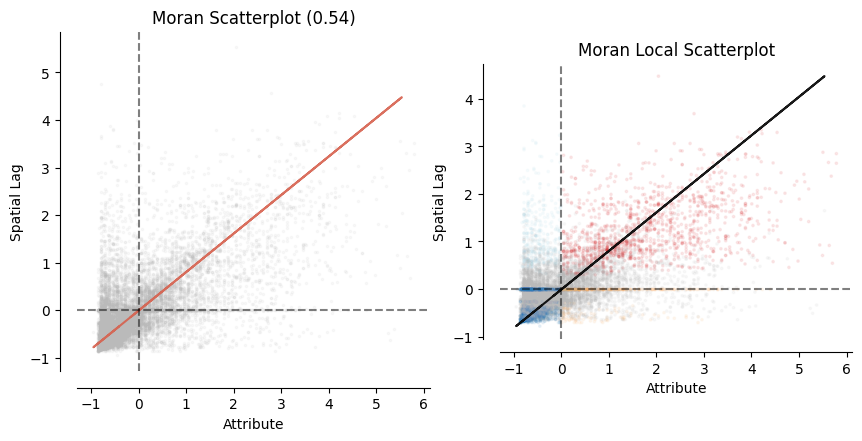

lag distance of 2.22 kms


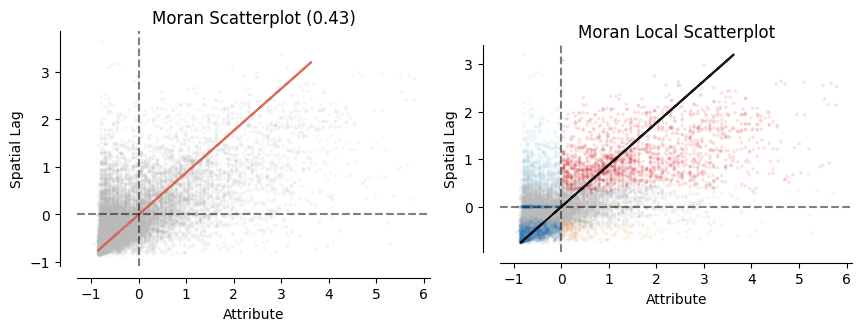

lag distance of 3.33 kms


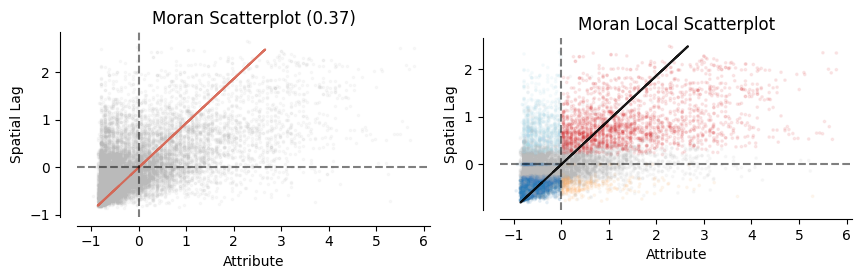

lag distance of 4.44 kms


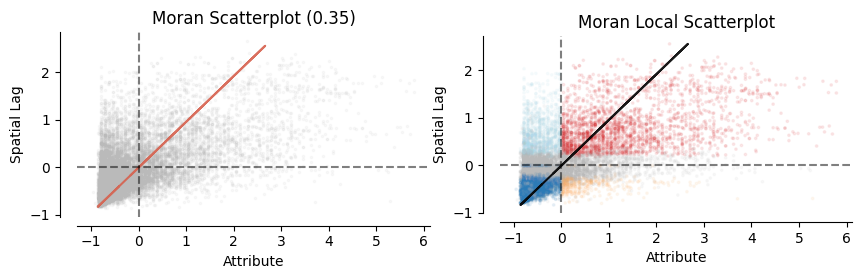

lag distance of 5.550000000000001 kms


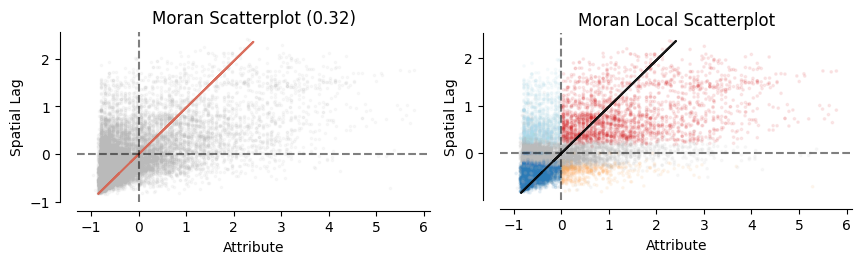

lag distance of 6.66 kms


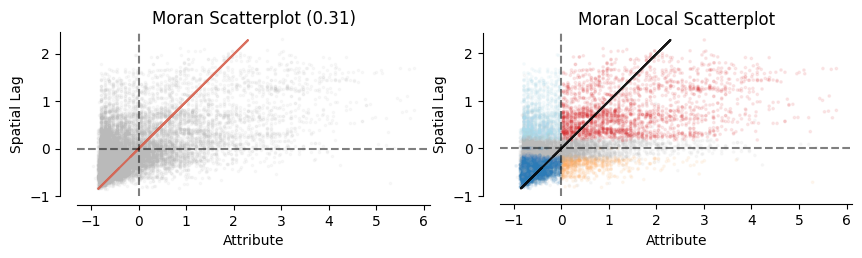

lag distance of 7.7700000000000005 kms


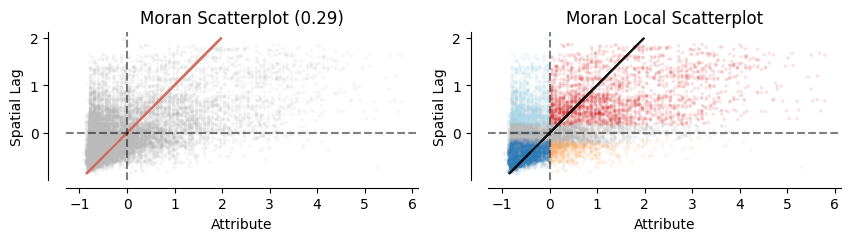

lag distance of 8.88 kms


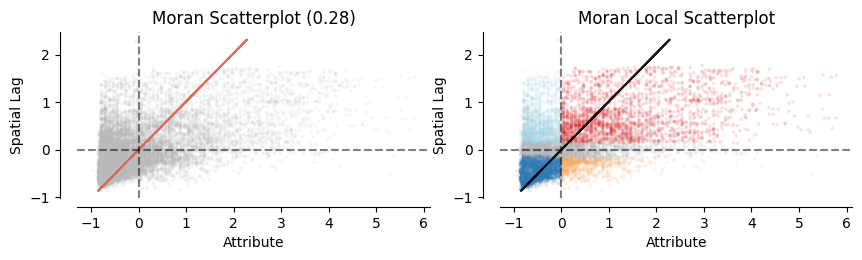

In [12]:
water_chemistry_variable = 'fluoride_value'
lag_distances = [0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
from esda.moran import Moran
from splot.esda import moran_scatterplot
import pysal
from pysal.lib import weights
import matplotlib.pyplot as plt
import warnings

# Suppress RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
for lag_distance in lag_distances:
    print(f'lag distance of {lag_distance*111} kms')
    w = pysal.lib.weights.DistanceBand.from_dataframe(well_analysis_full_geo_disolved_first, threshold=lag_distance, binary=True,silence_warnings=True)
    y = well_analysis_full_geo_disolved_first[water_chemistry_variable]
    moran = Moran(y, w)
    moran_loc = Moran_Local(y, w)
    fig, axs = plt.subplots(1,2,  figsize=(10,10),
                            subplot_kw={'aspect': 'equal'})
    moran_scatterplot(moran, ax=axs[0],scatter_kwds={'s': 3 ,'alpha': 0.08})
    moran_scatterplot(moran_loc, p=0.05, ax=axs[1],scatter_kwds={'s': 3, 'alpha': 0.08})
    plt.show()



lag distance of 0.555 kms


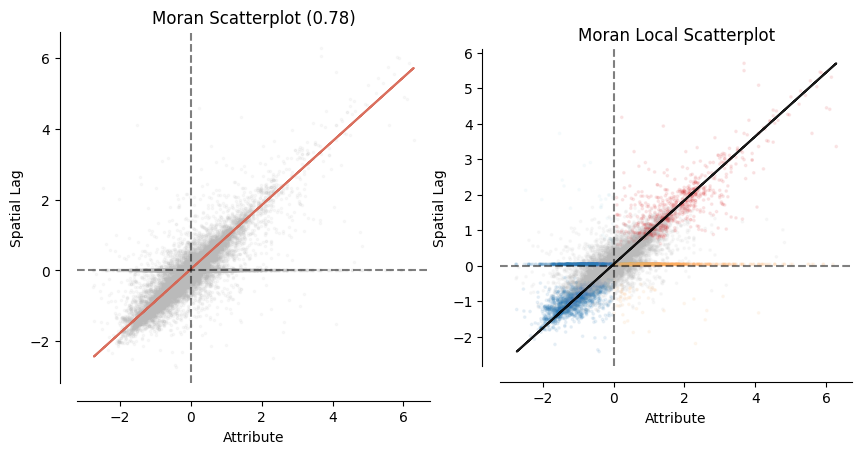

lag distance of 1.11 kms


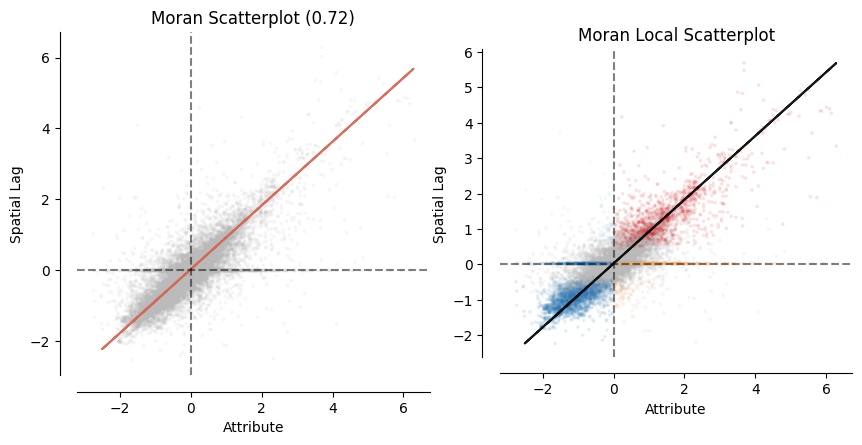

lag distance of 2.22 kms


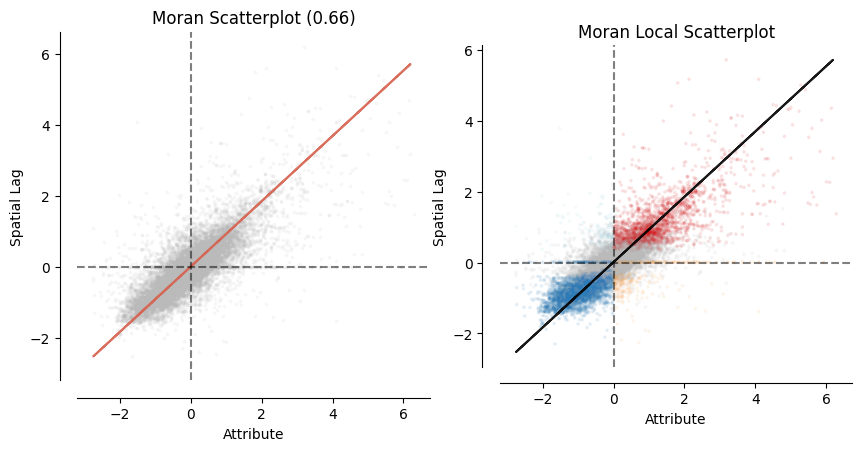

lag distance of 3.33 kms


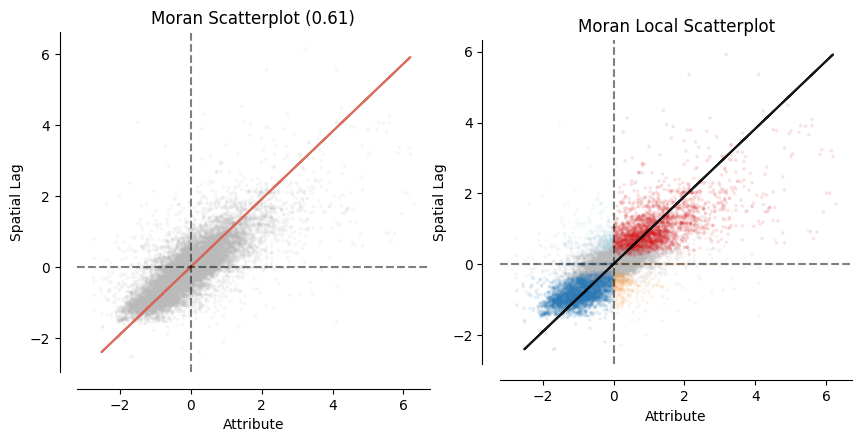

lag distance of 4.44 kms


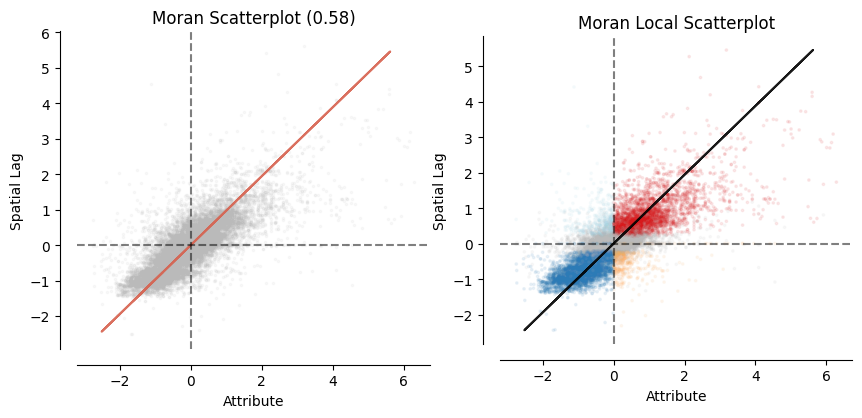

lag distance of 5.550000000000001 kms


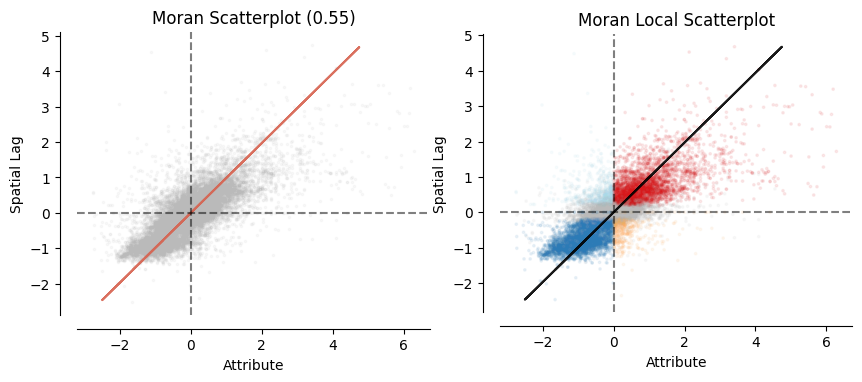

lag distance of 6.66 kms


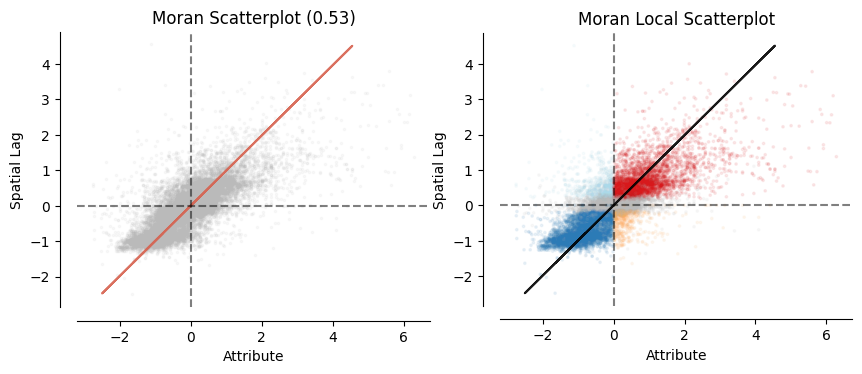

lag distance of 7.7700000000000005 kms


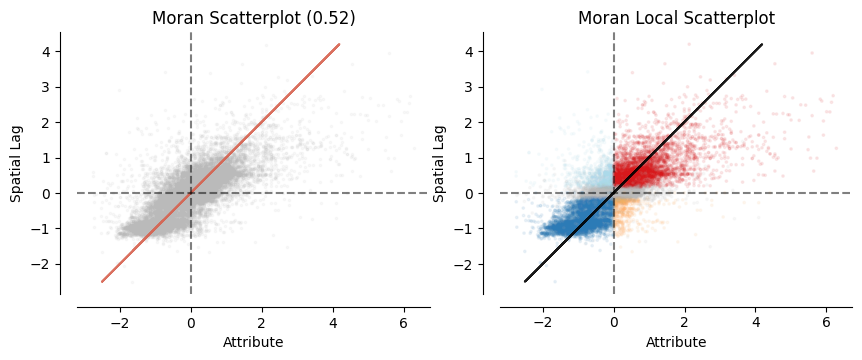

lag distance of 8.88 kms


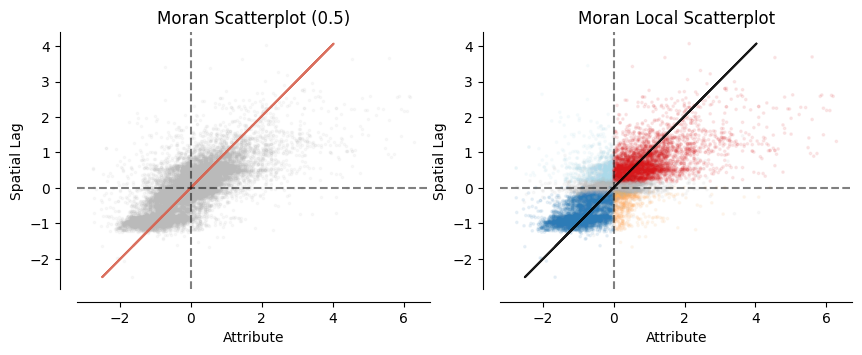

In [13]:
water_chemistry_variable = 'bicarbonate_value'
lag_distances = [0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
from esda.moran import Moran
from splot.esda import moran_scatterplot
import pysal
from pysal.lib import weights
import matplotlib.pyplot as plt
import warnings

# Suppress RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
for lag_distance in lag_distances:
    print(f'lag distance of {lag_distance*111} kms')
    w = pysal.lib.weights.DistanceBand.from_dataframe(well_analysis_full_geo_disolved_first, threshold=lag_distance, binary=True,silence_warnings=True)
    y = well_analysis_full_geo_disolved_first[water_chemistry_variable]
    moran = Moran(y, w)
    moran_loc = Moran_Local(y, w)
    fig, axs = plt.subplots(1,2,  figsize=(10,10),
                            subplot_kw={'aspect': 'equal'})
    moran_scatterplot(moran, ax=axs[0],scatter_kwds={'s': 3 ,'alpha': 0.08})
    moran_scatterplot(moran_loc, p=0.05, ax=axs[1],scatter_kwds={'s': 3, 'alpha': 0.08})
    plt.show()

lag distance of 0.555 kms


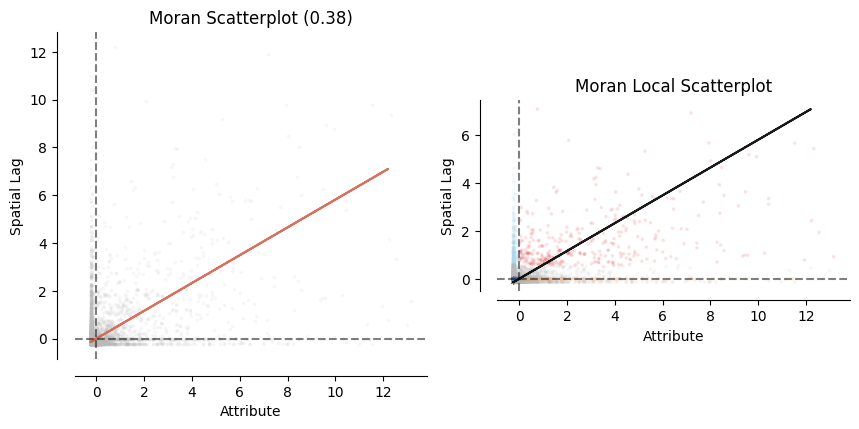

lag distance of 1.11 kms


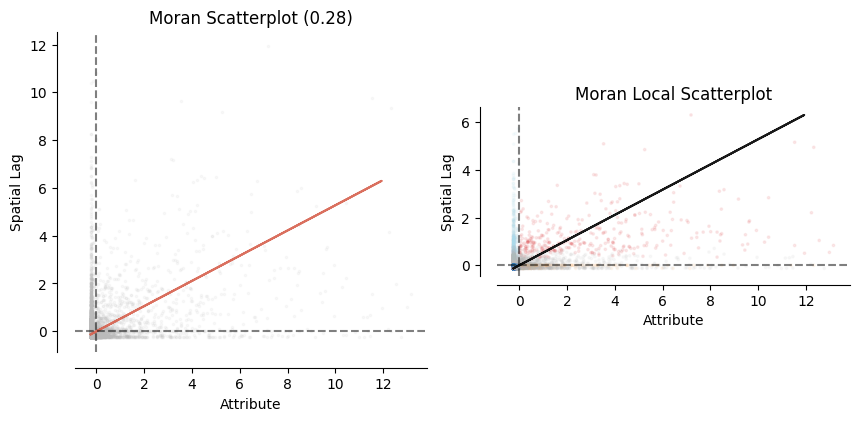

lag distance of 2.22 kms


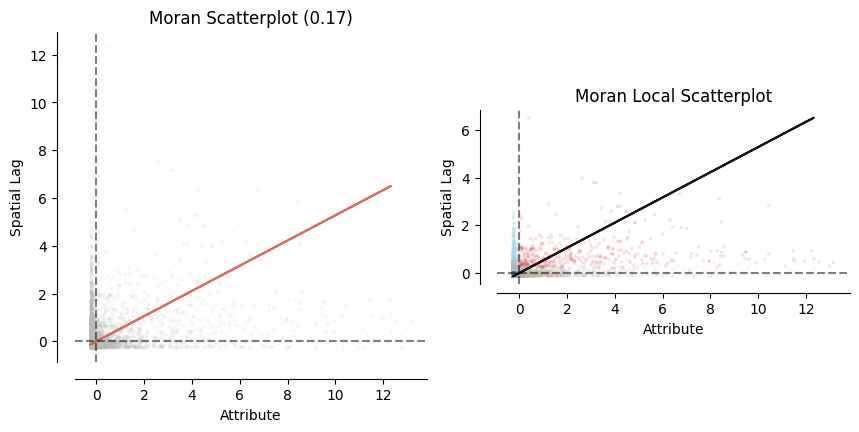

lag distance of 3.33 kms


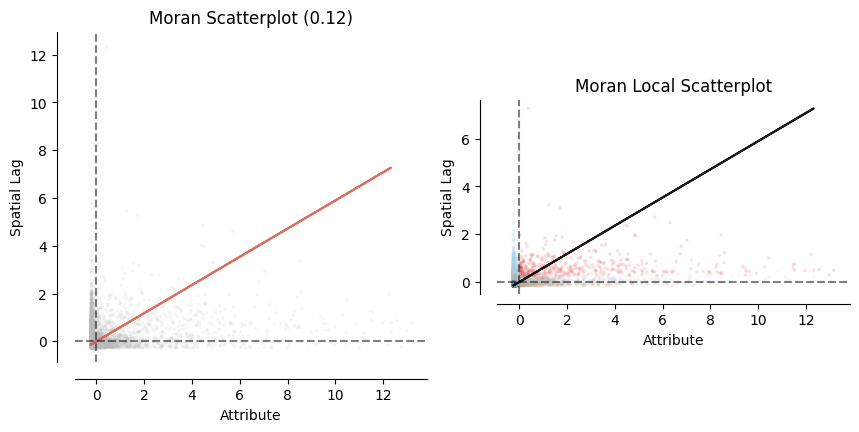

lag distance of 4.44 kms


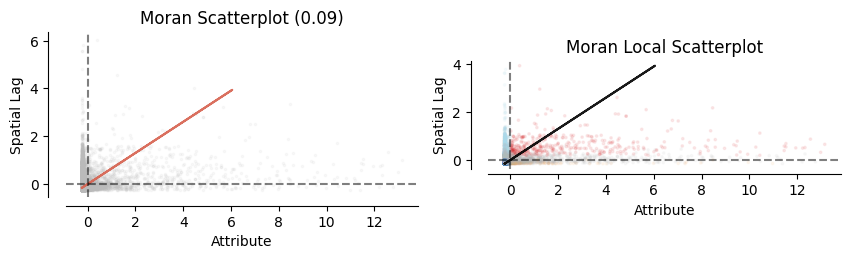

lag distance of 5.550000000000001 kms


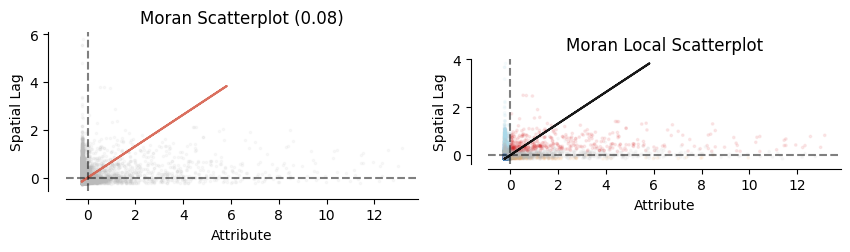

lag distance of 6.66 kms


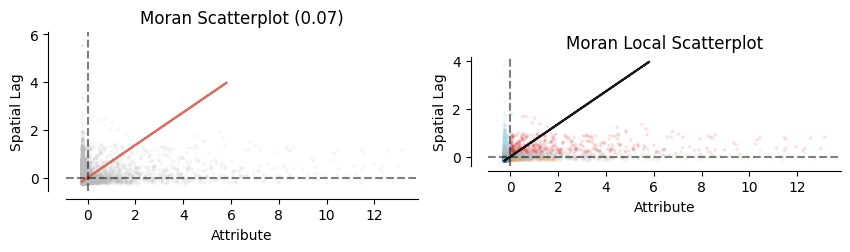

lag distance of 7.7700000000000005 kms


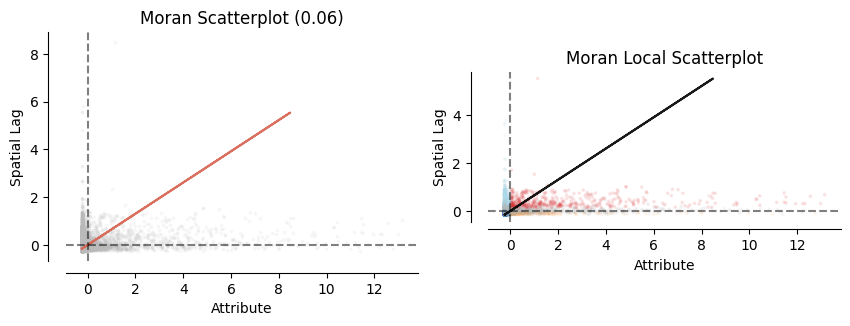

lag distance of 8.88 kms


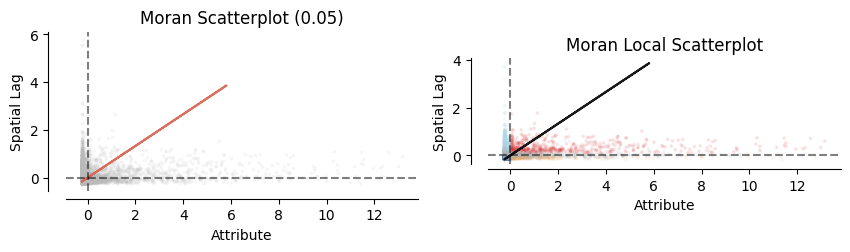

In [16]:
water_chemistry_variable = 'nitrite + nitrate as nitrogen_value'
lag_distances = [0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
from esda.moran import Moran
from splot.esda import moran_scatterplot
import pysal
from pysal.lib import weights
import matplotlib.pyplot as plt
import warnings

# Suppress RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
for lag_distance in lag_distances:
    print(f'lag distance of {lag_distance*111} kms')
    w = pysal.lib.weights.DistanceBand.from_dataframe(well_analysis_full_geo_disolved_first, threshold=lag_distance, binary=True,silence_warnings=True)
    y = well_analysis_full_geo_disolved_first[water_chemistry_variable]
    moran = Moran(y, w)
    moran_loc = Moran_Local(y, w)
    fig, axs = plt.subplots(1,2,  figsize=(10,10),
                            subplot_kw={'aspect': 'equal'})
    moran_scatterplot(moran, ax=axs[0],scatter_kwds={'s': 3 ,'alpha': 0.08})
    moran_scatterplot(moran_loc, p=0.05, ax=axs[1],scatter_kwds={'s': 3, 'alpha': 0.08})
    plt.show()